# Underfitting y Overfitting en Modelos Polinomiales

En este ejemplo, generaremos un dataset basado en un polinomio de grado 2 y veremos cómo ajustan diferentes modelos de regresión con grados crecientes. Observaremos los errores de entrenamiento y testeo para analizar los conceptos de underfitting y overfitting.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.set_printoptions(suppress=True, precision=6)
pd.set_option("display.width", 1000)

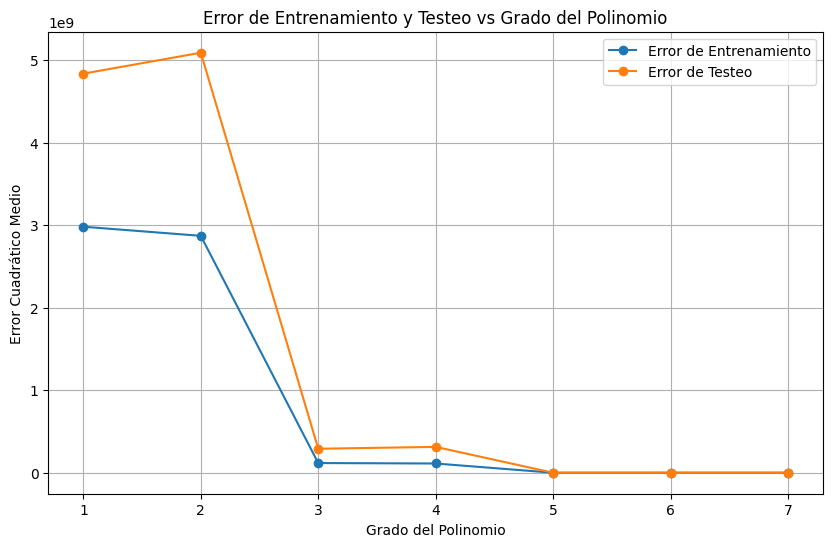

In [43]:
# Generar dataset basado en un polinomio de grado 5 con algo de ruido
np.random.seed(42)
n_samples = 100

X = np.random.uniform(-10, 10, size=n_samples)
y = (3.5 * X**5 + 3.5 * X**4 + 1.5 * X**3 + 4.5 * X**2 - 3.0 * X + 2) + np.random.normal(0, 10, size=n_samples)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# reshape(): filas x columnas (-1 significa filas en modo automatico)
# reshape(-1, 1) transforma el array de 70 elementos en una matriz de 70x1
# print(X_train.shape)
# print(X_train.reshape(-1, 1).shape)

# Función para ajustar y mostrar los resultados con diferentes grados del polinomio
def ajustar_modelo(grado):

    # calcular 2 polinómicas de grado 'grado' que pasen por 'X_train' y 'X_test' respectivamente
    poly = PolynomialFeatures(degree=grado)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    # print('X_train_poly, grado', grado, '\n', pd.DataFrame(X_train_poly).head(2), '\n')
    # print('X_test_poly, grado', grado, '\n', pd.DataFrame(X_test_poly).head(2), '\n')

    # calcular una lineal que pase por 'X_train_poly'
    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)

    # usar el modelo entrenado (lineal) para predecir valores de 'X_train_poly' (la polinómica)
    y_train_pred = modelo.predict(X_train_poly)
    y_test_pred = modelo.predict(X_test_poly)

    # calcular el error cuadrático medio (MSE)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return modelo, train_error, test_error, poly

# Ajustar diferentes modelos
modelos = {}
train_errors = []
test_errors = []

for grado in range(1, 8):  # Probar de grado 1 a 7
    modelo, train_error, test_error, poly = ajustar_modelo(grado)
    modelos[grado] = (modelo, poly)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Mostrar resultados
# print('Train errors', '\n', pd.DataFrame(train_errors).head(5), '\n')
# print('Test errors', '\n', pd.DataFrame(test_errors).head(5), '\n')

# Graficar errores de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(range(1, 8), test_errors, label='Error de Testeo', marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error de Entrenamiento y Testeo vs Grado del Polinomio')
plt.legend()
plt.grid(True)
plt.show()


Podemos ver que con un modelo lineal (grado 1), el error de entrenamiento y testeo es alto, lo que indica underfitting. A medida que aumentamos el grado del polinomio, el error de entrenamiento disminuye, pero el error de testeo comienza a aumentar con grados mayores, lo que sugiere overfitting.